<a href="https://colab.research.google.com/github/kannandreams/AI-CodeBook/blob/master/nlp/word_embedding/imdb_sentimentAnalysis_subwords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [2]:
!pip uninstall tensorflow

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
y
  Successfully uninstalled tensorflow-1.15.0


In [2]:
!pip uninstall tensorflow-gpu

In [0]:
#!pip install tensorflow-gpu==2.0.0-alpha0
# alpha can throw possible error when importing tensorflow-datasets . so lets upgrade to beta1 version.
# error description : AttributeError: module 'tensorflow._api.v2.compat.v2.autograph.experimental' has no attribute 'do_not_convert'

In [8]:
#!pip uninstall tensorflow-gpu==2.0.0-alpha0
#!pip uninstall tensorflow-gpu==2.0.0-beta1
#!pip install tensorflow-gpu==2.0.0
!pip install tensorflow==2.0.0

     |████████████████████████████████| 380.8MB 43kB/s 
     |████████████████████████████████| 3.8MB 22.7MB/s 
     |████████████████████████████████| 450kB 65.9MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
import tensorflow_datasets as tfds
imdb,info = tfds.load("imdb_reviews/subwords8k",with_info=True,as_supervised=True)
train_data,test_data = imdb['train'],imdb['test']

In [4]:
tokenizer = info.features['text'].encoder
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [6]:
sample_string = 'Tensorflow, from basics to mastery'
sample_string1 = 'We are monitoring the respiratory illness outbreak caused by coronavirus (COVID-19)'

tokenized_string = tokenizer.encode(sample_string)
print('Tokenized String is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print('Original String is {}'.format(original_string))

tokenized_string1 = tokenizer.encode(sample_string1)
print('Tokenized String is {}'.format(tokenized_string1))

original_string1 = tokenizer.decode(tokenized_string1)
print('Original String is {}'.format(original_string1))


Tokenized String is [6307, 2327, 2934, 2, 48, 4249, 4429, 7, 2652, 8050]
Original String is Tensorflow, from basics to mastery
Tokenized String is [433, 29, 1068, 5143, 912, 1, 2148, 5843, 3185, 47, 905, 432, 237, 2243, 5930, 43, 4748, 2698, 2052, 449, 28, 2341, 4926, 7997, 7974, 3729, 7970]
Original String is We are monitoring the respiratory illness outbreak caused by coronavirus (COVID-19)


In [7]:
for ts in tokenized_string:
  print('{} ----> {}'.format(ts,tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
2934 ----> flow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [8]:
for ts in tokenized_string1:
  print('{} ----> {}'.format(ts,tokenizer.decode([ts])))

433 ----> We 
29 ----> are 
1068 ----> mon
5143 ----> ito
912 ----> ring 
1 ----> the 
2148 ----> res
5843 ----> pir
3185 ----> ator
47 ----> y 
905 ----> ill
432 ----> ness 
237 ----> out
2243 ----> break 
5930 ----> caused 
43 ----> by 
4748 ----> cor
2698 ----> ona
2052 ----> vir
449 ----> us
28 ---->  (
2341 ----> CO
4926 ----> VI
7997 ----> D
7974 ----> -
3729 ----> 19
7970 ----> )


In [9]:
embedding_dim=64
model = tf.keras.Sequential([
             tf.keras.layers.Embedding(tokenizer.vocab_size,embedding_dim),
             tf.keras.layers.GlobalAveragePooling1D(),
             tf.keras.layers.Dense(6,activation='relu'),
             tf.keras.layers.Dense(1,activation='sigmoid')        
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [17]:
num_epochs=5
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
result = model.fit(train_data,validation_data=test_data,epochs=num_epochs)

Epoch 1/5
25000/25000 [==============================] - 325s 13ms/step - loss: 5.9605e-08 - accuracy: 0.5043 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
25000/25000 [==============================] - 268s 11ms/step - loss: 5.9602e-08 - accuracy: 0.5043 - val_loss: 5.9605e-08 - val_accuracy: 0.5026
Epoch 3/5
25000/25000 [==============================] - 271s 11ms/step - loss: 5.9602e-08 - accuracy: 0.5043 - val_loss: 5.9605e-08 - val_accuracy: 0.5026
Epoch 4/5
25000/25000 [==============================] - 272s 11ms/step - loss: 5.9602e-08 - accuracy: 0.5043 - val_loss: 5.9605e-08 - val_accuracy: 0.5026
Epoch 5/5
25000/25000 [==============================] - 283s 11ms/step - loss: 5.9602e-08 - accuracy: 0.5043 - val_loss: 5.9605e-08 - val_accuracy: 0.5026


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The handle 'u' has a label of '_' which cannot be automatically added to the legend.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
 

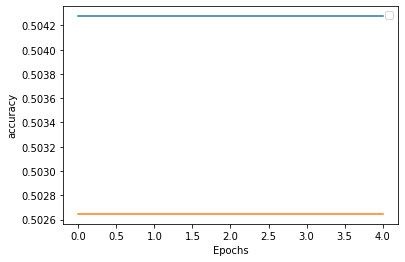

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The handle 's' has a label of '_' which cannot be automatically added to the legend.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
 

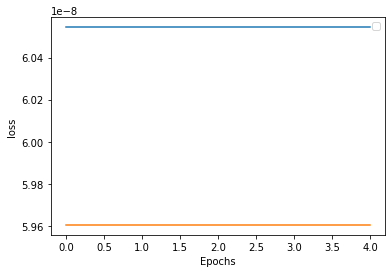

In [22]:
import matplotlib.pyplot as plt

def plot_graphs(result,string):
  plt.plot(result.history[string])
  plt.plot(result.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend(string,'val_'+string)
  plt.show()

plot_graphs(result,'accuracy')
plot_graphs(result,'loss')
